<a href="https://colab.research.google.com/github/Zthan/FantasyBaseball/blob/main/Spraychart_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 48.8 MB/s eta 0:00:00


Enter First and last name: matt vierling
Enter number next to Home Team Stadium:
1) Generic
2) Angels
3) Astros
4) Athletics
5) Blue Jays
6) Braves
7) Brewers
8) Cardinals
9) Cubs
10) Diamond Backs
11) Dodgers
12) Giants
13) Guardians
14) Mariners
15) Marlins
16) Mets
17) Nationals
18) Orioles
19) Padres
20) Phillies
21) Pirates
22) Rangers
23) Rays
24) Red Sox
25) Reds
26) Rockies
27) Royals
28) Tigers
29) Twins
30) White Sox
31) Yankees
Home Team Stadium: 28
Selected Home Team Stadium: tigers
matt
vierling
Gathering player lookup table. This may take a moment.
663837
Gathering Player Data


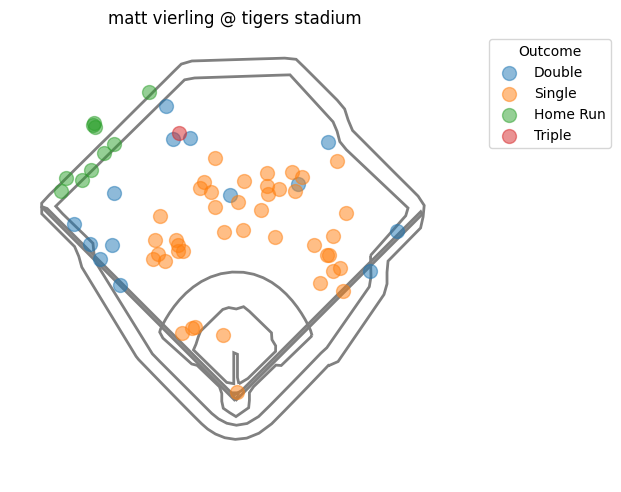

<Axes: title={'center': 'matt vierling @ tigers stadium'}>

In [2]:
from pybaseball import statcast_batter, spraychart, playerid_lookup, playerid_reverse_lookup
import pandas as pd

# ID of pitch_data_2024: 954566fd9c4a4fa89868b1100f903665
# pitch_data = gis.content.get('954566fd9c4a4fa89868b1100f903665')

# defintion for selecting stadiums
def selectFromDict(options, name):
    index = 0
    indexValidList = []
    print('Enter number next to ' + name + ':')
    for optionName in options:
        index = index + 1
        indexValidList.extend([options[optionName]])
        print(str(index) + ') ' + optionName)
    inputValid = False
    while not inputValid:
        inputRaw = input(name + ': ')
        inputNo = int(inputRaw) - 1
        if inputNo > -1 and inputNo < len(indexValidList):
            selected = indexValidList[inputNo]
            print('Selected ' +  name + ': ' + selected)
            inputValid = True
            break
        else:
            print('Please select a valid ' + name + ' number')
    return selected

options = {}
options['Generic'] = 'generic'
options['Angels'] = 'angels'
options['Astros'] = 'astros'
options['Athletics'] = 'athletics'
options['Blue Jays'] = 'blue_jays'
options['Braves'] = 'braves'
options['Brewers'] = 'brewers'
options['Cardinals'] = 'cardinals'
options['Cubs'] = 'cubs'
options['Diamond Backs'] = 'diamondbacks'
options['Dodgers'] = 'dodgers'
options['Giants'] = 'giants'
options['Guardians'] = 'indians'
options['Mariners'] = 'mariners'
options['Marlins'] = 'marlins'
options['Mets'] = 'mets'
options['Nationals'] = 'nationals'
options['Orioles'] = 'orioles'
options['Padres'] = 'padres'
options['Phillies'] = 'phillies'
options['Pirates'] = 'pirates'
options['Rangers'] = 'rangers'
options['Rays'] = 'rays'
options['Red Sox'] = 'red_sox'
options['Reds'] = 'reds'
options['Rockies'] = 'rockies'
options['Royals'] = 'royals'
options['Tigers'] = 'tigers'
options['Twins'] = 'twins'
options['White Sox'] = 'white_sox'
options['Yankees'] = 'yankees'



team_stadium_list = ['angels', 'astros', 'athletics', 'blue_jays', 'braves', 'brewers', 'cardinals', 'cubs',
                     'diamondbacks', 'dodgers', 'generic', 'giants', 'indians', 'mariners', 'marlins', 'mets',
                     'nationals', 'orioles', 'padres', 'phillies', 'pirates', 'rangers', 'rays', 'red_sox', 'reds',
                     'rockies', 'royals', 'tigers', 'twins', 'white_sox', 'yankees']

entered_name = input("Enter First and last name: ").split()
name_first = entered_name[0]
name_last = entered_name[1]

option = selectFromDict(options, 'Home Team Stadium')

#team_stadium = 'astros'
team_stadium = option
team_stadium_display = team_stadium

#entered_name = 'Jose Altuve'
#name_first = entered_name.split(' ')[0]
#name_last = entered_name.split(' ')[1]


if team_stadium == 'indians':
    team_stadium_display = 'Guardians'
else:
    pass


# make year selecteable from list eventually?
#entered_name.split(' ')

print(name_first)
print(name_last)
lookup_number = playerid_lookup(name_last, name_first, fuzzy=True)
hitter = lookup_number['key_mlbam'].iloc[0]
print(hitter)
hitter_name_last = lookup_number['name_last'].iloc[0]
hitter_name_first = lookup_number['name_first'].iloc[0]

#chart_title = '%s %s @ %s stadium' % (hitter_name_first,  hitter_name_last, team_stadium)

team_stadium_dict = {'angels': 'LAA', 'astros': 'HOU', 'athletics': 'ATH', 'blue_jays': 'TOR', 'braves': 'ATL', 'brewers': 'MIL',
                     'cardinals': 'STL', 'cubs': 'CHC', 'diamondbacks': 'AZ', 'dodgers': 'LAD', 'giants': 'SF', 'indians': 'CLE',
                     'mariners': 'SEA', 'marlins': 'MIA', 'mets': 'NYM', 'nationals': 'WSH', 'orioles': 'BAL', 'padres': 'SD',
                     'phillies': 'PHI', 'pirates':'PIT', 'rangers': 'TEX', 'rays': 'TB', 'red_sox': 'BOS', 'reds': 'CIN',
                     'rockies': 'COL', 'royals': 'KC', 'tigers':'DET', 'twins':'MIN', 'white_sox':'CWS', 'yankees': 'NYY'}


if team_stadium == 'generic':
    pass
else:
    home_team = team_stadium_dict[team_stadium]

chart_title = '%s %s @ %s stadium' % (hitter_name_first,  hitter_name_last, team_stadium_display)

pitch_data = statcast_batter('2024-03-28', '2024-09-30', hitter)

pitch_data = pitch_data.loc[pitch_data['batter'].isin([hitter])]
pitch_data = pitch_data.loc[pitch_data['events'].isin(['single', 'double', 'triple', 'home_run'])]

if team_stadium !='generic':
    pitch_data = pitch_data.loc[pitch_data['home_team'].isin([home_team])]
else:
    pass

spraychart(pitch_data, team_stadium, title=chart_title)